In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [38]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [39]:
train = pd.read_csv('HousePrice/train.csv')
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
df = train.copy()
df = df.drop('Id', axis=1)

<AxesSubplot:>

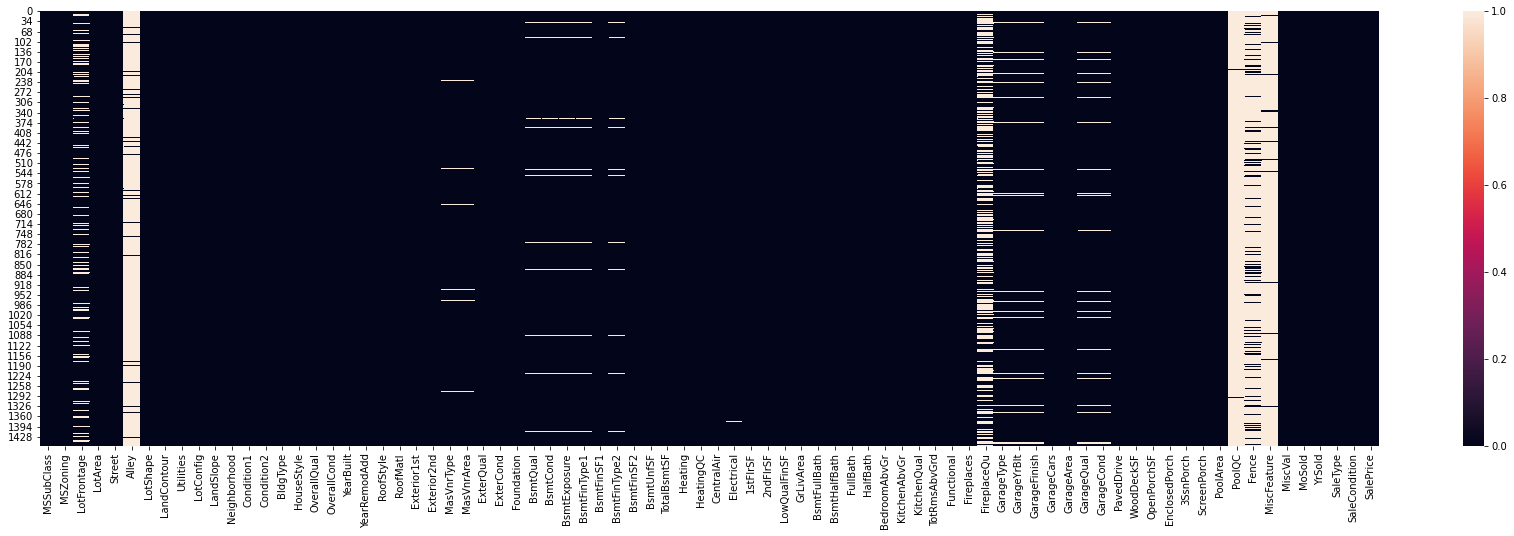

In [41]:
plt.figure(figsize=(30, 8))
sns.heatmap(df.isnull())

In [42]:
nullcols = df.isnull().sum()
nullcols = nullcols[nullcols>0]
nullcols

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [43]:
for col in nullcols.keys():
    unique_vals = pd.unique(df[col].astype(str))
    print('\n',col, 'is of data type', str(df[col].dtypes), 'has', str(len(unique_vals)), 'unique values and', str(nullcols[col]), 'Null values')
    if len(unique_vals)<25:
        print(unique_vals)


 LotFrontage is of data type float64 has 111 unique values and 259 Null values

 Alley is of data type object has 3 unique values and 1369 Null values
['nan' 'Grvl' 'Pave']

 MasVnrType is of data type object has 5 unique values and 8 Null values
['BrkFace' 'None' 'Stone' 'BrkCmn' 'nan']

 MasVnrArea is of data type float64 has 328 unique values and 8 Null values

 BsmtQual is of data type object has 5 unique values and 37 Null values
['Gd' 'TA' 'Ex' 'nan' 'Fa']

 BsmtCond is of data type object has 5 unique values and 37 Null values
['TA' 'Gd' 'nan' 'Fa' 'Po']

 BsmtExposure is of data type object has 5 unique values and 38 Null values
['No' 'Gd' 'Mn' 'Av' 'nan']

 BsmtFinType1 is of data type object has 7 unique values and 37 Null values
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'nan' 'LwQ']

 BsmtFinType2 is of data type object has 7 unique values and 38 Null values
['Unf' 'BLQ' 'nan' 'ALQ' 'Rec' 'LwQ' 'GLQ']

 Electrical is of data type object has 6 unique values and 1 Null values
['SBrkr' '

In [44]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [45]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [46]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'Fence'], axis=1) 

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [47]:
# Filling NA values with most frequent/suitable values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

<AxesSubplot:>

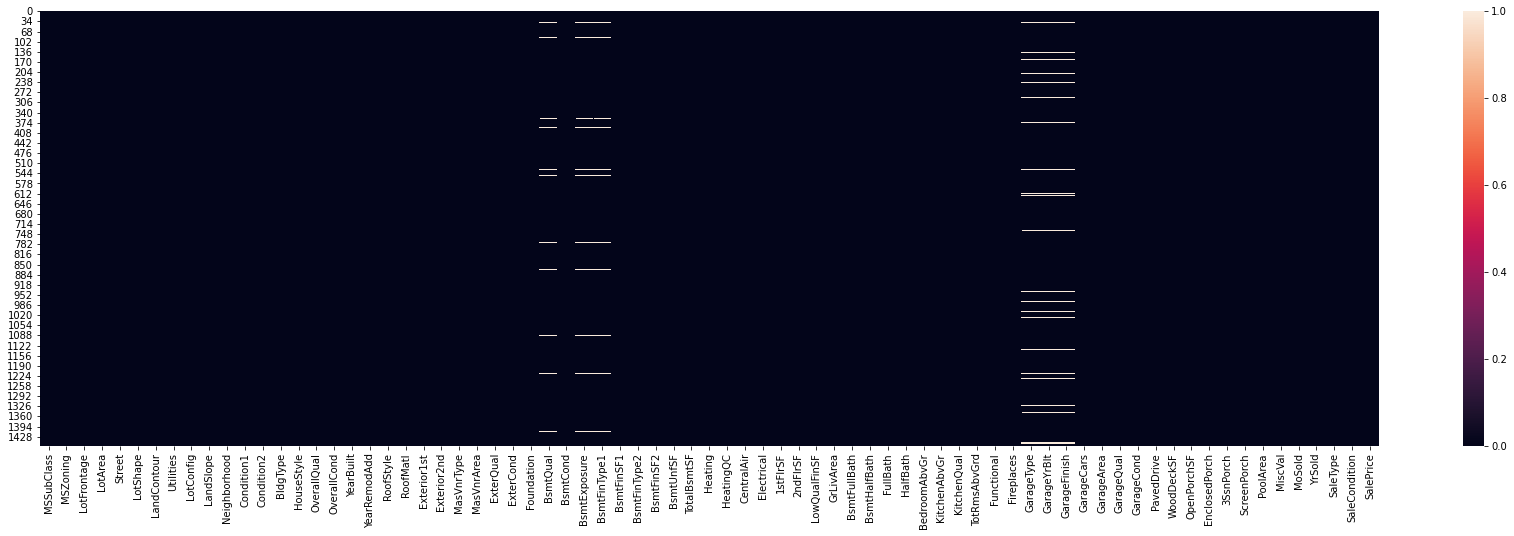

In [48]:
plt.figure(figsize=(30, 8))
sns.heatmap(df.isnull())

In [49]:
df = df.dropna()

<AxesSubplot:>

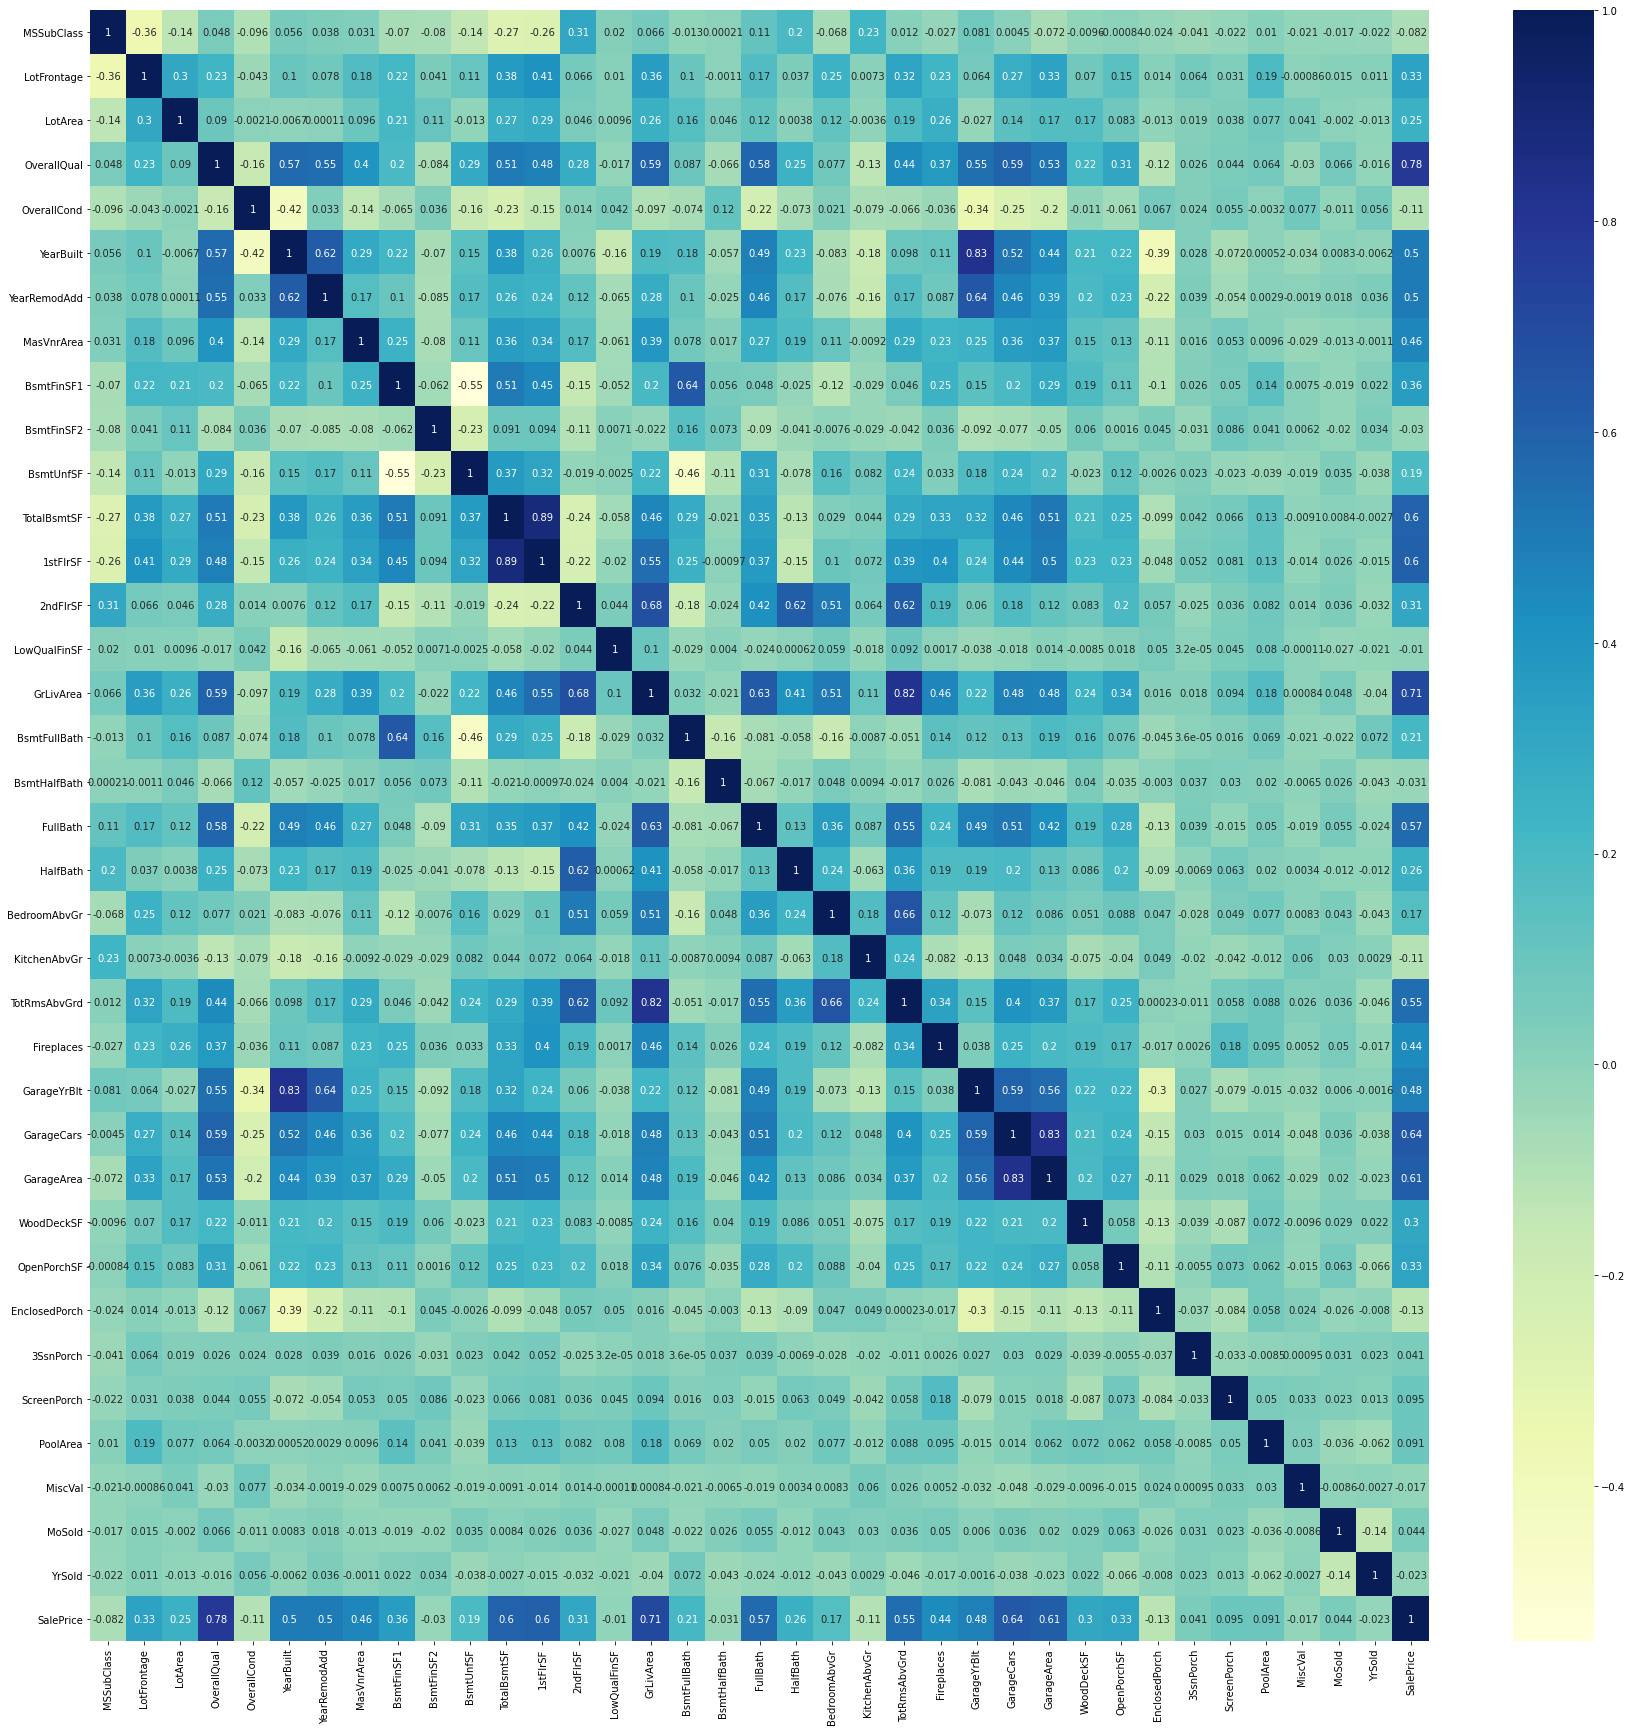

In [50]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [51]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [52]:
df['YearBuilt'] = df['YearBuilt'].apply(lambda x: 2022-x)
df['YrSold'] = df['YrSold'].apply(lambda x: 2022-x)

In [53]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)

In [54]:
print(cat_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


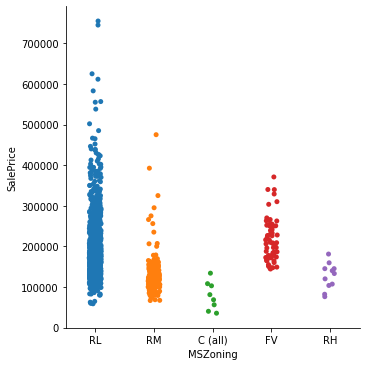

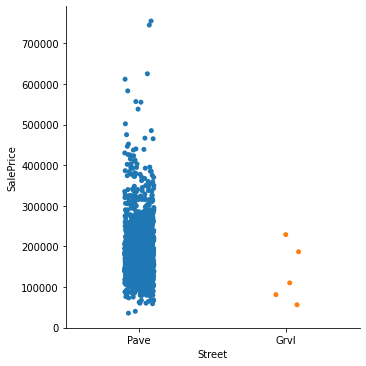

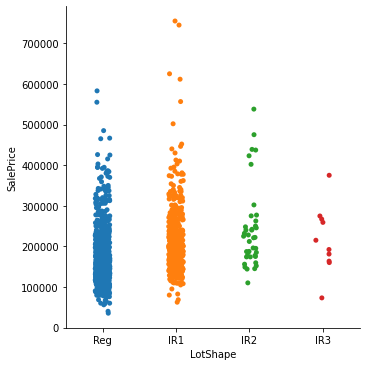

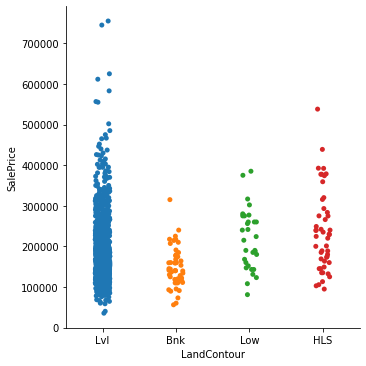

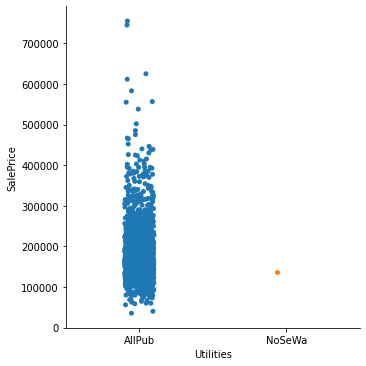

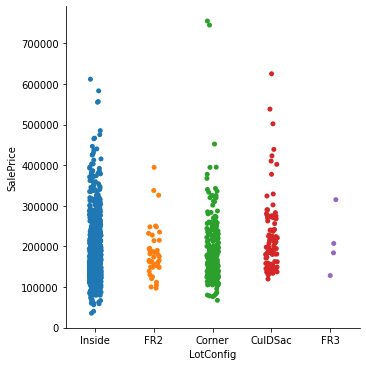

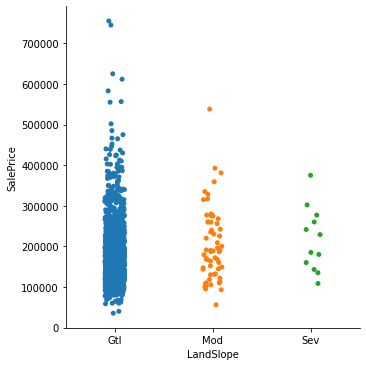

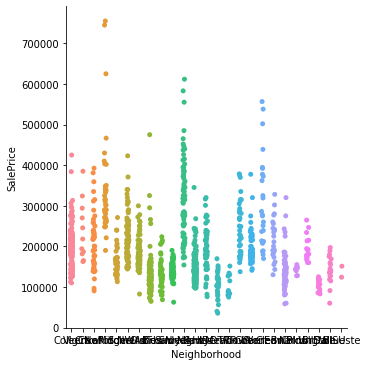

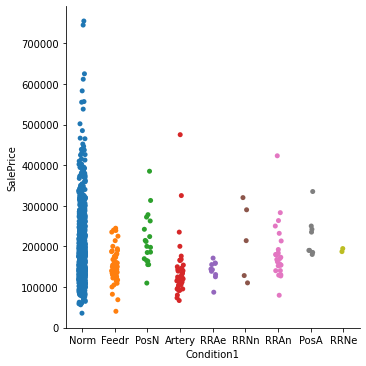

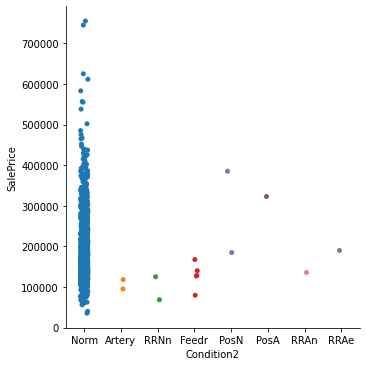

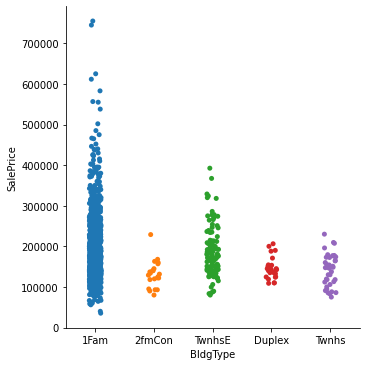

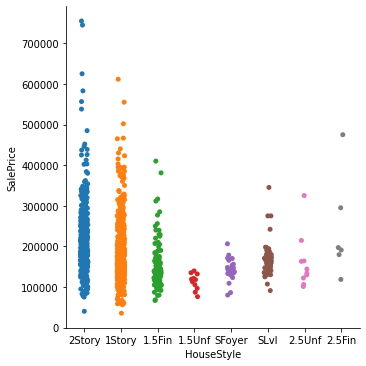

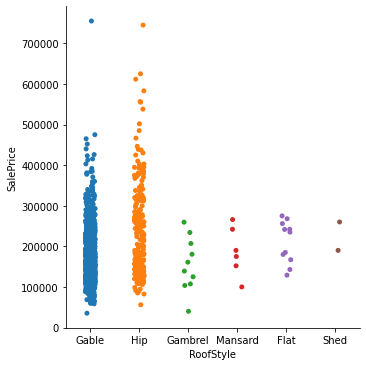

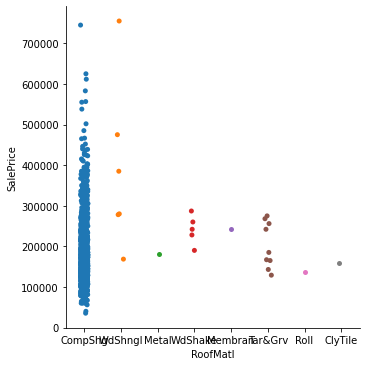

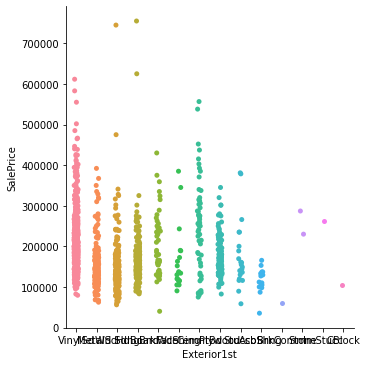

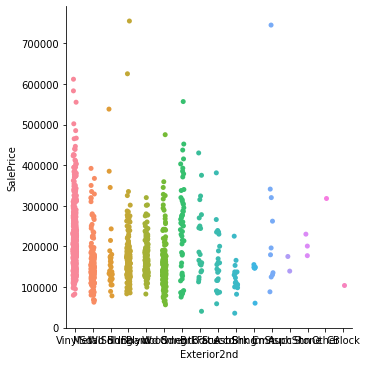

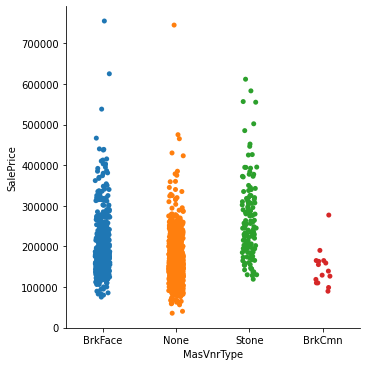

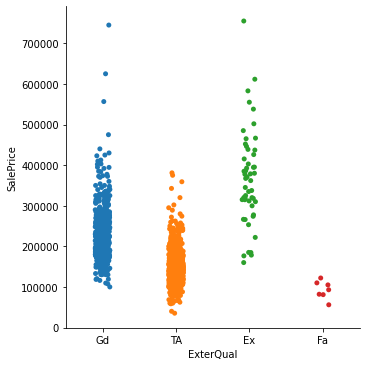

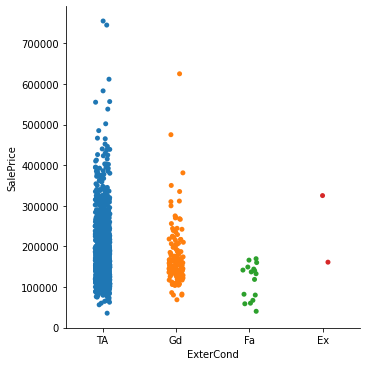

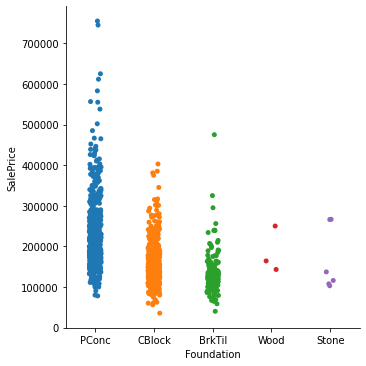

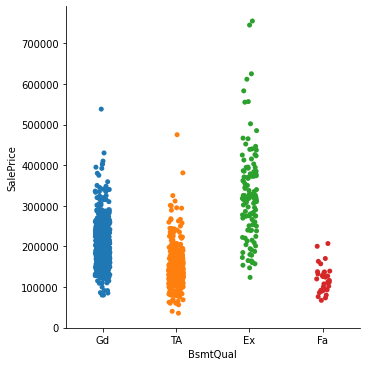

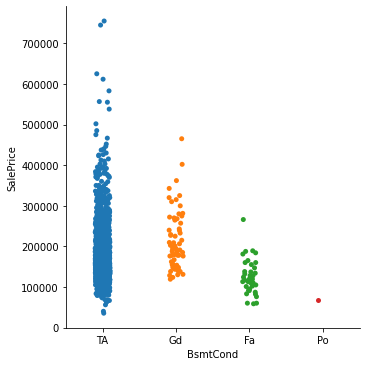

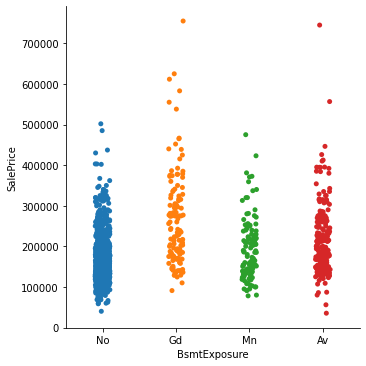

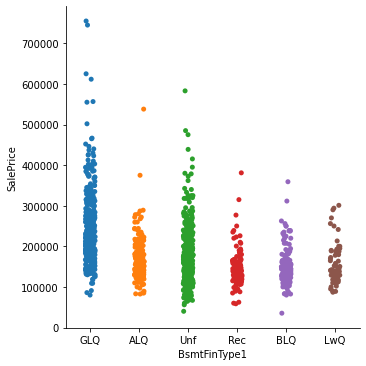

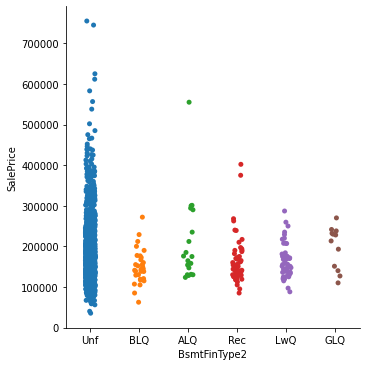

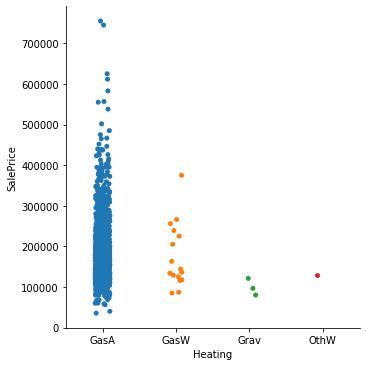

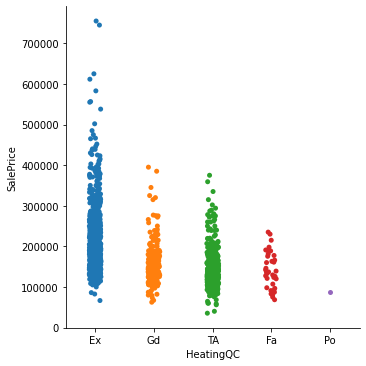

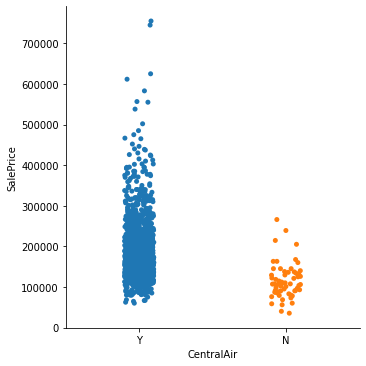

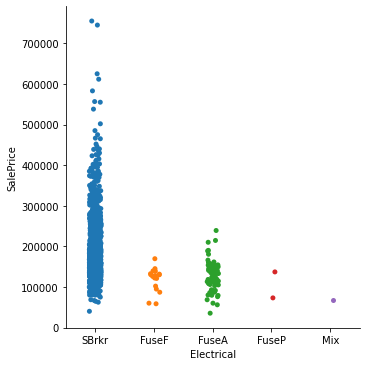

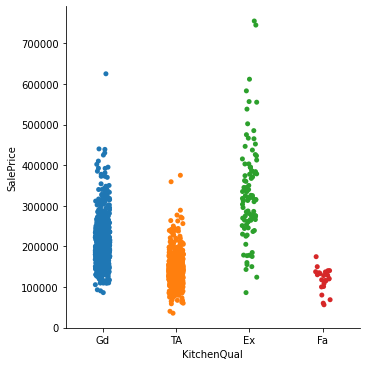

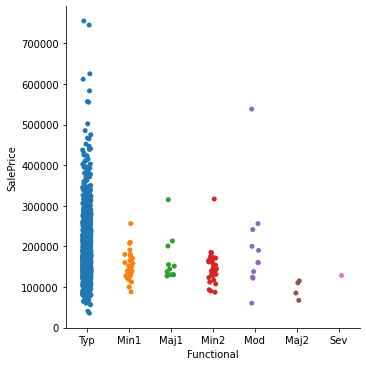

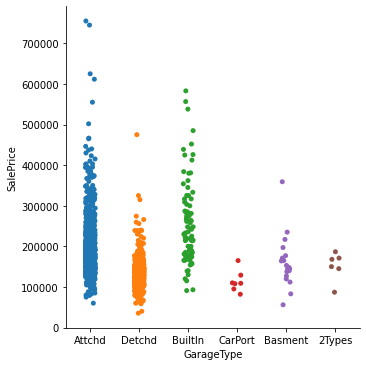

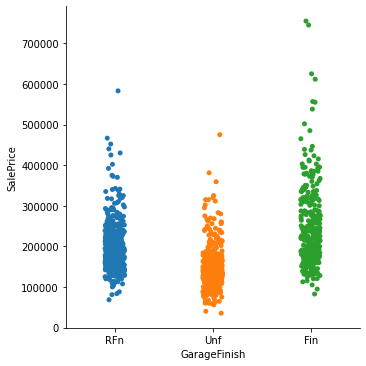

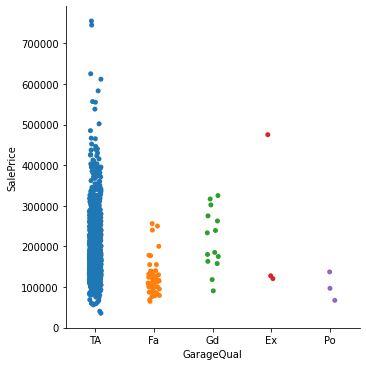

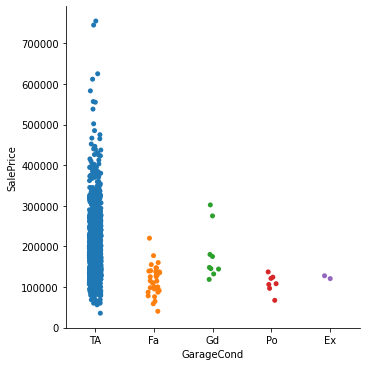

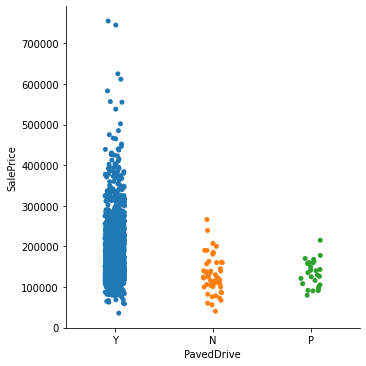

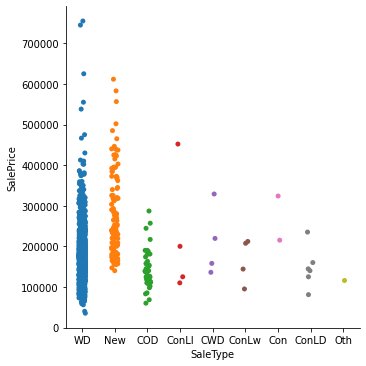

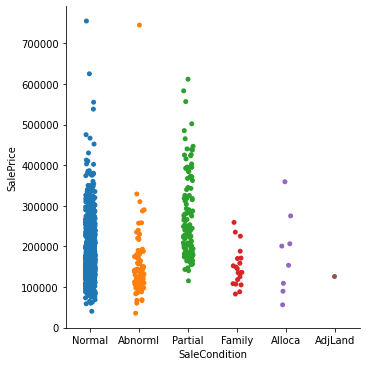

In [55]:
for col in cat_columns:
    sns.catplot(x=col, y="SalePrice", data=df)

In [56]:
df = df.drop(['YearRemodAdd', 'Exterior2nd', 'Street', 'Condition2', 'RoofMatl', 'Exterior1st'], axis=1)

In [57]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)

In [58]:
df = pd.get_dummies(df, columns = cat_columns, drop_first=True)

In [59]:
display(df.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,19,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,46,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,21,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,107,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,22,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [60]:
X = df.drop('SalePrice', axis =1)
y = df['SalePrice']

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = True)

In [65]:
from sklearn.linear_model import LinearRegression

model0 = LinearRegression()
model0.fit(X_train, y_train)

print(model0.score(X_test, y_test))

0.8348504477071012


In [66]:
y_pred = list(model0.predict(X_test))
y_ = list(y_test)

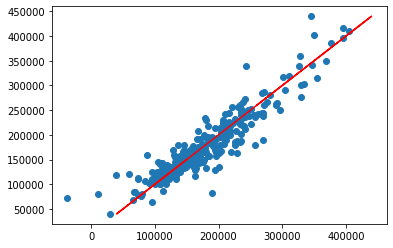

In [67]:
plt.scatter(y_pred, y_)
plt.plot(y_, y_, color= 'red')
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.8685628607355402


In [69]:
y_pred = list(model.predict(X_test))
y_ = list(y_test)

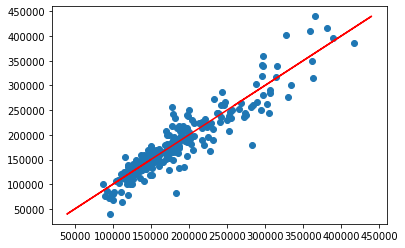

In [70]:
plt.scatter(y_pred, y_)
plt.plot(y_, y_, color= 'red')
plt.show()

In [71]:

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 18)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [72]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

print(model2.score(X_test, y_test))

0.75193855485461


In [73]:
y_pred = list(model2.predict(X_test))
y_ = list(y_test)

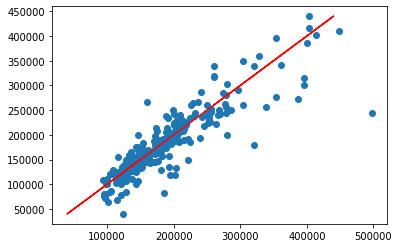

In [74]:
plt.scatter(y_pred, y_)
plt.plot(y_, y_, color= 'red')
plt.show()